In [31]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('vehiculos.csv')

In [3]:
data.describe()

,compactness,circularity,distance_circularity,radius_ratio,pr_axis_aspect_ratio,max_length_aspect_ratio,scatter_ratio,elongatedness,pr_axis_rectangularity,max_length_rectangularity,scaled_variance_major_axis,scaled_variance_minor_axis,scaled_radius_gyration,skewness_major_axis,skewness_minor_axis,kurtosis_minor_axis,kurtosis_major_axis,hollows_ratio
count,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000,846.00000,846.000000,846.000000,846.000000,846.000000,846.000000
mean,93.678487,44.861702,82.088652,168.940898,61.693853,8.567376,168.839243,40.933806,20.582742,147.998818,188.625296,439.911348,174.70331,72.462175,6.377069,12.599291,188.932624,195.632388
std,8.234474,6.169866,15.771533,33.472183,7.888251,4.601217,33.244978,7.811560,2.592138,14.515652,31.394837,176.692614,32.54649,7.486974,4.918353,8.931240,6.163949,7.438797
min,73.000000,33.000000,40.000000,104.000000,47.000000,2.000000,112.000000,26.000000,17.000000,118.000000,130.000000,184.000000,109.00000,59.000000,0.000000,0.000000,176.000000,181.000000
25%,87.000000,40.000000,70.000000,141.000000,57.000000,7.000000,146.250000,33.000000,19.000000,137.000000,167.000000,318.250000,149.00000,67.000000,2.000000,5.000000,184.000000,190.250000
50%,93.000000,44.000000,80.000000,167.000000,61.000000,8.000000,157.000000,43.000000,20.000000,146.000000,178.500000,364.000000,173.00000,71.500000,6.000000,11.000000,188.000000,197.000000
75%,100.000000,49.000000,98.000000,195.000000,65.000000,10.000000,198.000000,46.000000,23.000000,159.000000,217.000000,587.000000,198.00000,75.000000,9.000000,19.000000,193.000000,201.000000
max,119.000000,59.000000,112.000000,333.000000,138.000000,55.000000,265.000000,61.000000,29.000000,188.000000,320.000000,1018.000000,268.00000,135.000000,22.000000,41.000000,206.000000,211.000000


In [4]:
data.dtypes

compactness                   float64
circularity                   float64
distance_circularity          float64
radius_ratio                  float64
pr_axis_aspect_ratio          float64
max_length_aspect_ratio       float64
scatter_ratio                 float64
elongatedness                 float64
pr_axis_rectangularity        float64
max_length_rectangularity     float64
scaled_variance_major_axis    float64
scaled_variance_minor_axis    float64
scaled_radius_gyration        float64
skewness_major_axis           float64
skewness_minor_axis           float64
kurtosis_minor_axis           float64
kurtosis_major_axis           float64
hollows_ratio                 float64
vehicle_class                  object
dtype: object

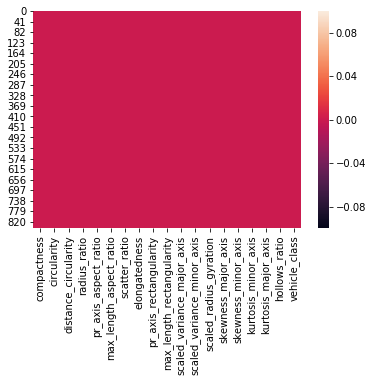

In [6]:
sns.heatmap(data.isnull())

In [53]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

In [11]:
data['vehicle_class'].unique()

array(['van', 'saab', 'bus', 'opel'], dtype=object)

In [10]:
x = np.asanyarray(data.drop('vehicle_class', axis=1))

In [12]:
y = np.asanyarray(data['vehicle_class'])

In [13]:
x_train, x_test, y_train, y_test = train_test_split(x,y,train_size=0.8, random_state=42)

In [14]:
from sklearn.neighbors import KNeighborsClassifier

In [24]:
model = KNeighborsClassifier()

In [25]:
model.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [26]:
y_predict = model.predict(x_test)

In [27]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

         bus       0.81      0.81      0.81        52
        opel       0.34      0.40      0.37        30
        saab       0.47      0.40      0.43        48
         van       0.86      0.93      0.89        40

    accuracy                           0.65       170
   macro avg       0.62      0.63      0.63       170
weighted avg       0.64      0.65      0.64       170



In [28]:
error = []
for i in range(1,30):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train, y_train)
    predict = knn.predict(x_test)
    error.append(np.mean(y_test != predict))

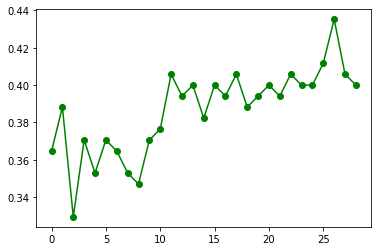

In [41]:
plt.plot(error, marker='o', color='green')

In [42]:
model = KNeighborsClassifier(n_neighbors=3)

In [43]:
model.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [45]:
predict = model.predict(x_test)

In [48]:
print(classification_report(y_test, predict))

              precision    recall  f1-score   support

         bus       0.84      0.79      0.81        52
        opel       0.36      0.47      0.41        30
        saab       0.54      0.44      0.48        48
         van       0.88      0.95      0.92        40

    accuracy                           0.67       170
   macro avg       0.65      0.66      0.65       170
weighted avg       0.68      0.67      0.67       170



In [49]:
print(confusion_matrix(y_test, predict))

[[41  3  6  2]
 [ 2 14 12  2]
 [ 5 21 21  1]
 [ 1  1  0 38]]
